# Consumer Analysis & Forecasting

Complete analysis of consumer behavior patterns and sales forecasting.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

## Load Data

Loading all datasets for analysis.

In [2]:
# Load datasets
consumer_data = pd.read_csv('../data/consumer_data.csv')
consumer_raw = pd.read_csv('../data/consumer_data_raw.csv')
predictions_actuals = pd.read_csv('../data/predictions_vs_actuals.csv')
model_coef = pd.read_csv('../data/model_coefficients.csv')
model_perf = pd.read_csv('../data/model_performance.csv')

print('Data loaded successfully!')
print(f'Consumer data shape: {consumer_data.shape}')
print(f'Predictions vs Actuals shape: {predictions_actuals.shape}')

Data loaded successfully!
Consumer data shape: (525, 21)
Predictions vs Actuals shape: (525, 24)


## Data Exploration

Exploring key statistics and distributions.

In [3]:
# Display basic statistics
print('Consumer Data Overview:')
print(consumer_data.describe())
print('\nData Info:')
print(consumer_data.info())

Consumer Data Overview:
        record_id         year     quarter       month        week  \
count  525.000000   525.000000  525.000000  525.000000  525.000000   
mean   263.000000  2024.495238    2.504762    6.542857   26.257143   
std    151.698715     0.500454    1.114819    3.475730   15.155069   
min      1.000000  2024.000000    1.000000    1.000000    1.000000   
25%    132.000000  2024.000000    2.000000    4.000000   13.000000   
50%    263.000000  2024.000000    3.000000    7.000000   26.000000   
75%    394.000000  2025.000000    3.000000    9.000000   39.000000   
max    525.000000  2025.000000    4.000000   12.000000   52.000000   

            price  competitor_price  price_difference_pct       demand  \
count  525.000000        525.000000            525.000000   525.000000   
mean    94.514838         94.069410             -0.502438  1510.417143   
std     36.358230         37.212732              8.925306   392.549510   
min     43.570000         37.940000            -1

## Model Performance Analysis

Analyzing model accuracy and performance metrics.

In [4]:
# Display model performance
print('Model Performance Metrics:')
print(model_perf)

print('Model Coefficients:')
print(model_coef)

Model Performance Metrics:
       Metric       Value
0    R2_Train    0.354824
1     R2_Test    0.385168
2  RMSE_Train  311.041453
3   RMSE_Test  322.383500
4   MAE_Train  268.446487
5    MAE_Test  270.608574
Model Coefficients:
                     Feature  Coefficient
0                      price    -3.513943
1           competitor_price    -0.781669
2       price_difference_pct     4.637320
3            marketing_spend     0.023946
4  consumer_confidence_index    15.657924
5          unemployment_rate  -107.258920
6               is_promotion   392.079682
7            seasonal_factor   985.934332
8               trend_factor  1435.651145
9                  Intercept -1711.147681


## Predictions Visualization

Comparing predicted vs actual values.

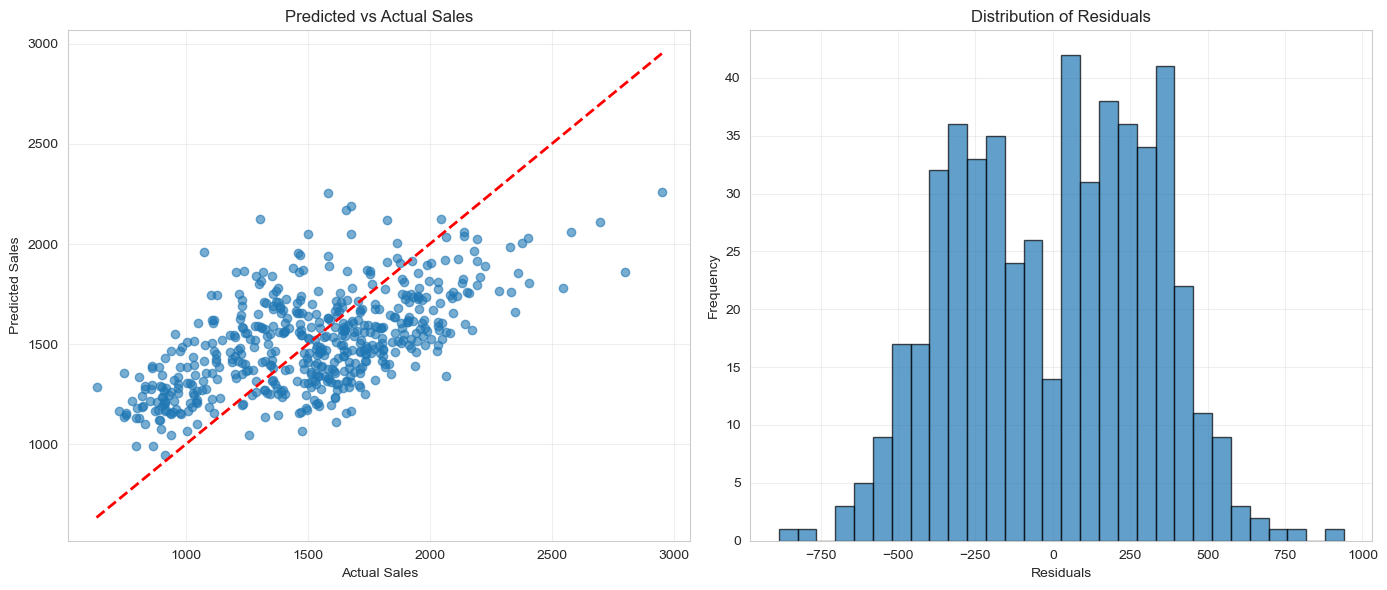

Mean Absolute Error: 268.88
Root Mean Squared Error: 313.34


In [5]:
# Plot predictions vs actuals
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(predictions_actuals['demand'], predictions_actuals['predicted_demand'], alpha=0.6)
plt.plot([predictions_actuals['demand'].min(), predictions_actuals['demand'].max()],
         [predictions_actuals['demand'].min(), predictions_actuals['demand'].max()],
         'r--', lw=2)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Predicted vs Actual Sales')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
residuals = predictions_actuals['demand'] - predictions_actuals['predicted_demand']
plt.hist(residuals, bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f'Mean Absolute Error: {np.abs(residuals).mean():.2f}')
print(f'Root Mean Squared Error: {np.sqrt((residuals**2).mean()):.2f}')

## Conclusion

### Overview
This analysis demonstrates an end-to-end consumer demand forecasting workflow using a simulated dataset to explore relationships between pricing signals, external drivers, and consumer demand. The objective of the model is not to generate operational forecasts, but to illustrate how analytical techniques can support structured planning, validation, and decision-making in a business context.

### Model Logic
A regression-based modelling approach was selected to prioritise interpretability and transparency over predictive complexity. This enables individual demand drivers to be examined, quantified, and clearly communicated to stakeholders. Model logic and results are supported through coefficient analysis, performance metrics, and direct comparisons between actual and predicted demand values.

### Assumptions
The analysis is based on a synthetic dataset and assumes linear relationships between key drivers (such as price, marketing spend, and external indicators) and consumer demand. Consumer behaviour is assumed to be stable over the modelling period, with no major structural breaks or unobserved external shocks influencing outcomes. These assumptions simplify real-world complexity and are appropriate for a controlled simulation.

### Limitations
Results should be interpreted as illustrative rather than predictive. The use of simulated data limits external validity, and the regression approach does not capture non-linear effects, behavioural changes, or competitive dynamics that may be present in real markets. Forecast accuracy is therefore constrained by both the simplified data structure and modelling approach.

### Governance and Decision-Making Context
To support analytical governance, model outputs are validated using performance metrics and actual versus predicted comparisons. Data is structured to maintain a clear separation between raw inputs, processed datasets, model outputs, and validation artefacts, enabling transparency, auditability, and reproducibility. This approach reflects common practices in real-world business planning and analytical decision support, where explainability and validation are essential alongside quantitative results.
